In [1]:
import math
import numpy as np
import random as rand
from numba import jit,int64,float64
import matplotlib.pyplot as plt
%matplotlib inline

#To increase cell width:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Color-blind friendly colors to plot:
CB_colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

#Running the script with parameter definitions and functions:
%run populations_functions.py

K = 1; 0.5*dg/dt = 1250.0
D = 50.0; 0.5*dg**2/dt = 500.00000000000006


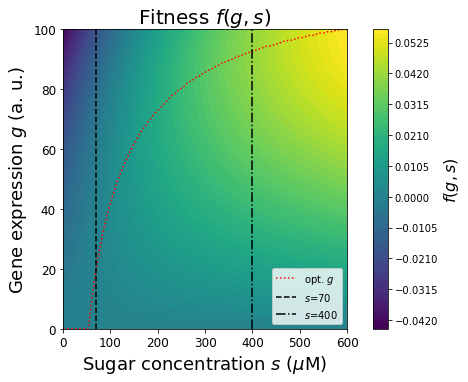

In [2]:
#Let's see plots:
#Now a contour plot. First define the mesh:
sugars_contour = 6*g
S,G = np.meshgrid(sugars_contour,g)
f_2D = fitness(G,S,delta)
fig, ax = plt.subplots(1,1,figsize=(6.4,5.2),constrained_layout=True)

#Plotting the contour plot itself:
img = ax.contourf(S,G,f_2D, levels=100)
cbar=plt.colorbar(img)
cbar.set_label(r"$f(g,s)$",fontsize=16)
#Plotting the optimum expression level:
opt_g = np.empty_like(sugars_contour)
i=0
for s in sugars_contour:
    fit = fitness(g,s,delta)
    opt_g[i] = g[np.argmax(fit)]
    i+=1
ax.plot(sugars_contour,opt_g,'r:',label=r'opt. $g$')
ax.axvline(70,color='k',linestyle='--',label=r'$s$=70')
ax.axvline(400,color='k',linestyle='dashdot',label=r'$s$=400')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel(r"Sugar concentration $s$ ($\mu$M)",fontsize=18)
ax.set_ylabel("Gene expression $g$ (a. u.)",fontsize=18)
ax.set_title("Fitness $f(g,s)$",fontsize=20)
ax.legend(loc='best')
# fig.savefig("1_fitness_landscape.svg",format="svg")
fig.savefig("1_fitness_landscape.pdf",format="pdf",dpi=2000,bbox_inches="tight",pad_inches=0.05)

In [3]:
#Choosing a sugar level and finding the regulation peak:
sug_low = 70
fit = fitness(g,sug_low,delta)
g_reg_sLow = g[np.argmax(fit)]
print(f"g_reg={round(g_reg_sLow,2)}")

#Generating the initial distributions:
g_peak = 0.5*(g_min+g_max)
#We don't want a standard deviation of 0, so even if the g_reg is 0, we set the s.d. of p0_reg to 1:
p0_unreg_sLow = Gaussian(g,g_peak,np.maximum(np.sqrt(alpha*g_peak),1))
p0_unreg_sLow = p0_unreg_sLow/np.trapz(p0_unreg_sLow,dx=dg)
# p0_unreg = np.ones_like(g)
# p0_unreg = p0_unreg/np.trapz(p0_unreg,dx=dg)
p0_reg_sLow = Gaussian(g,g_reg_sLow,np.maximum(np.sqrt(alpha*g_reg_sLow),1))
p0_reg_sLow = p0_reg_sLow/np.trapz(p0_reg_sLow,dx=dg)

g_reg=20.0


In [4]:
#Choosing a sugar level and finding the regulation peak:
sug_high = 400
fit = fitness(g,sug_high,delta)
g_reg_sHigh = g[np.argmax(fit)]
print(f"g_reg={round(g_reg_sHigh,2)}")

#Generating the initial distributions:
g_peak = 0.5*(g_min+g_max)
#We don't want a standard deviation of 0, so even if the g_reg is 0, we set the s.d. of p0_reg to 1:
p0_unreg_sHigh = Gaussian(g,g_peak,np.maximum(np.sqrt(alpha*g_peak),1))
p0_unreg_sHigh = p0_unreg_sHigh/np.trapz(p0_unreg_sHigh,dx=dg)
# p0_unreg = np.ones_like(g)
# p0_unreg = p0_unreg/np.trapz(p0_unreg,dx=dg)
p0_reg_sHigh = Gaussian(g,g_reg_sHigh,np.maximum(np.sqrt(alpha*g_reg_sHigh),1))
p0_reg_sHigh = p0_reg_sHigh/np.trapz(p0_reg_sHigh,dx=dg)

g_reg=92.8


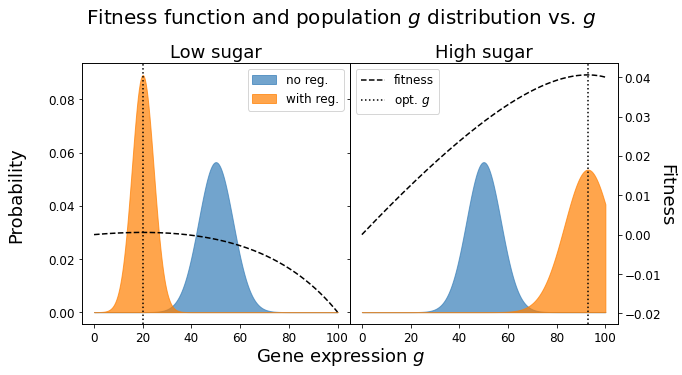

In [5]:
#Fitness and population distributions as a function of g:
fig,ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=[9.6,4.8])

# ax[0].plot(g,p0_unreg_sLow,color=CB_colors[0],label='no reg.')
ax[0].fill_between(g,y1=p0_unreg_sLow,y2=0,color=CB_colors[0],alpha=0.7,label='no reg.')
# ax[0].plot(g, p0_reg_sLow,color=CB_colors[1],label='with reg.')
ax[0].fill_between(g,y1=p0_reg_sLow,y2=0,color=CB_colors[1],alpha=0.7,label='with reg.')
ax[0].axvline(g_reg_sLow,color='k',linestyle=':')
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='both', which='minor', labelsize=10)
ax02 = ax[0].twinx()
ax02.plot(g,fitness(g,sug_low,delta),'k--')
ax02.set_yticks([])
ax02.tick_params(axis='both', which='major', labelsize=12)
ax02.tick_params(axis='both', which='minor', labelsize=10)
ax[0].legend(loc='best',fontsize=12)
ax[0].set_title('Low sugar',fontsize=18)

ax[1].fill_between(g,y1=p0_unreg_sHigh,y2=0,color=CB_colors[0],alpha=0.7)
ax[1].fill_between(g,y1=p0_reg_sHigh,y2=0,color=CB_colors[1],alpha=0.7)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='minor', labelsize=10)
# ax[1].set_yticks([])
ax12 = ax[1].twinx()
ax12.plot(g,fitness(g,sug_high,delta),color='k',ls='dashed',label='fitness')
ax12.axvline(g_reg_sHigh,color='k',linestyle=':',label=r'opt. $g$')
ax12.legend(loc='best',fontsize=12)
ax12.tick_params(axis='both', which='major', labelsize=12)
ax12.tick_params(axis='both', which='minor', labelsize=10)
ax[1].set_title('High sugar',fontsize=18)

ax02.get_shared_y_axes().join(ax02, ax12)

fig.text(0.5, 0.03, r"Gene expression $g$", ha='center', va='center', fontsize=18)
fig.text(0.03, 0.5, "Probability", ha='center', va='center', rotation='vertical', fontsize=18)
fig.text(0.97, 0.5, "Fitness", ha='center', va='center', rotation=270, fontsize=18)
fig.text(0.5, 1.01, r"Fitness function and population $g$ distribution vs. $g$", ha='center', va='center', rotation=0, fontsize=20)

plt.subplots_adjust(wspace=0)

fig.savefig("1_pop_distributions.pdf",format="pdf",dpi=2000,bbox_inches="tight",pad_inches=0.05)